In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df_subset.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

2785

In [5]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [6]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [7]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


In [8]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [9]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 1247296 words in this dataset


### Get child ages

In [10]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [11]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]

In [12]:
transcript_df["age_years"] = transcript_df["age_months"] / 12

In [13]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,19903,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,26941,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,21419,2019,2019,96.0,8.0


### Sentence lengths

In [14]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [15]:
from childes_mi.information_theory import mutual_information as mi

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.supervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.cluster.expected_mutual_info_fast module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics.cluster. Anything that cannot be imported from sklearn.metrics.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Run MI by age cohort

In [16]:
distances = np.arange(1,101)

1 1.5 15154 5439


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 1

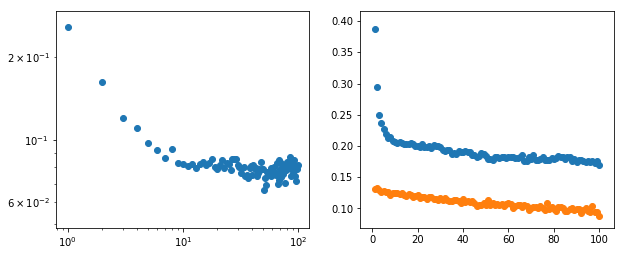

1.5 2 57580 19538


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 123.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 129.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 135.8min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 136.8min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 142.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 142.9min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 144.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 145.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 146.9min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 150.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 154.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 155.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 155.7min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 156.9min
[Parallel(n_jobs=-1)]: Done  15 tasks    

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 29.6min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 30.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 31.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 32.2min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 33.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 3

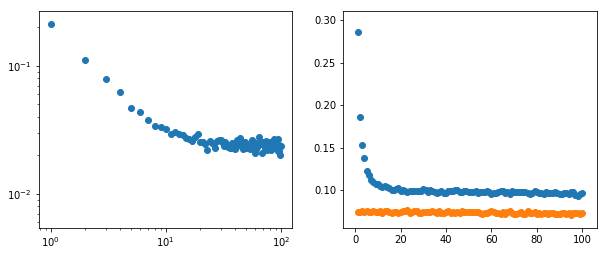

2 2.5 167722 50039


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:  

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGBUS(-7), SIGBUS(-7), SIGBUS(-7), SIGBUS(-7), SIGKILL(-9)}

In [17]:
mi_df = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_words",
        "n_unique_words",
    ]
)
# for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):#[::-1]):
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 > age_cohort_low) & (transcript_df.age_months/12 <= age_cohort_high)
    ]
    
    cohort_words = [[row.PID + "_" + i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
    #cohort_words = [[i for i in list(flatten(row.words)) if i not in [None, 'xxx']] for idx, row in cohort_subset.iterrows()]
    
    n_words = len(np.concatenate(cohort_words))
    n_unique_words = len(np.unique(np.concatenate(cohort_words)))
    print(age_cohort_low, age_cohort_high, n_words, n_unique_words)
    
    
    (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information(
        cohort_words, distances=distances, n_jobs=-1, mi_estimation="adjusted_mi_sklearn", prefer = None, verbosity=49
    )
    
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()
    
    mi_df.loc[len(mi_df)] = [
        MI,
        MI_var,
        shuff_MI,
        shuff_MI_var,
        distances,
        age_cohort_low,
        age_cohort_high,
        n_words,
        n_unique_words,
        
    ]
    
    #mi_df.to_pickle(DATA_DIR / 'mi' / 'childes_indv_ami.pickle')

In [ ]:
mi_df

In [18]:
mi_df.to_pickle(DATA_DIR / 'mi' / 'childes_indv_ami.pickle')




In [ ]:
#14% 34060/249448 [34:46<4:26:20, 13.48it/s]